## Библиотеки

In [347]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import make_scorer 
from sklearn.metrics import accuracy_score

from scipy.spatial import distance


from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import RadiusNeighborsClassifier

from mpl_toolkits import mplot3d
import matplotlib as mpl

%matplotlib inline

## Функции

## Обзор датасета

In [2]:
df_train = pd.read_csv("train_dataset_train.csv")
df_test = pd.read_csv("test_dataset_test.csv")

In [3]:
df_train.shape

(4222094, 6)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222094 entries, 0 to 4222093
Data columns (total 6 columns):
id             int64
Easting        float64
Northing       float64
Height         float64
Reflectance    float64
Class          int64
dtypes: float64(4), int64(2)
memory usage: 193.3 MB


Пострим на распределение данных

Text(0.5, 1.0, 'Распределение класса точки')

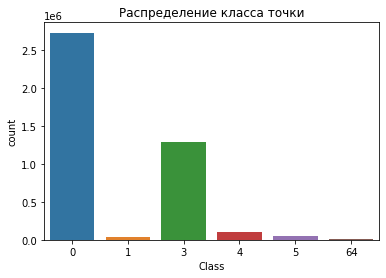

In [5]:
sns.countplot(x = "Class" , data  = df_train).set_title('Распределение класса точки')

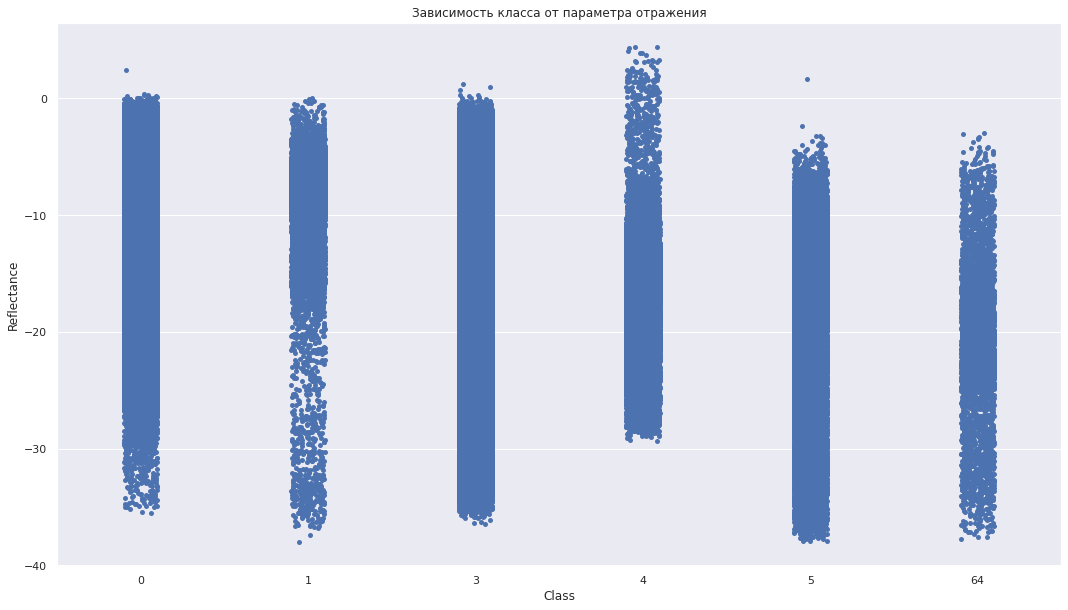

In [6]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

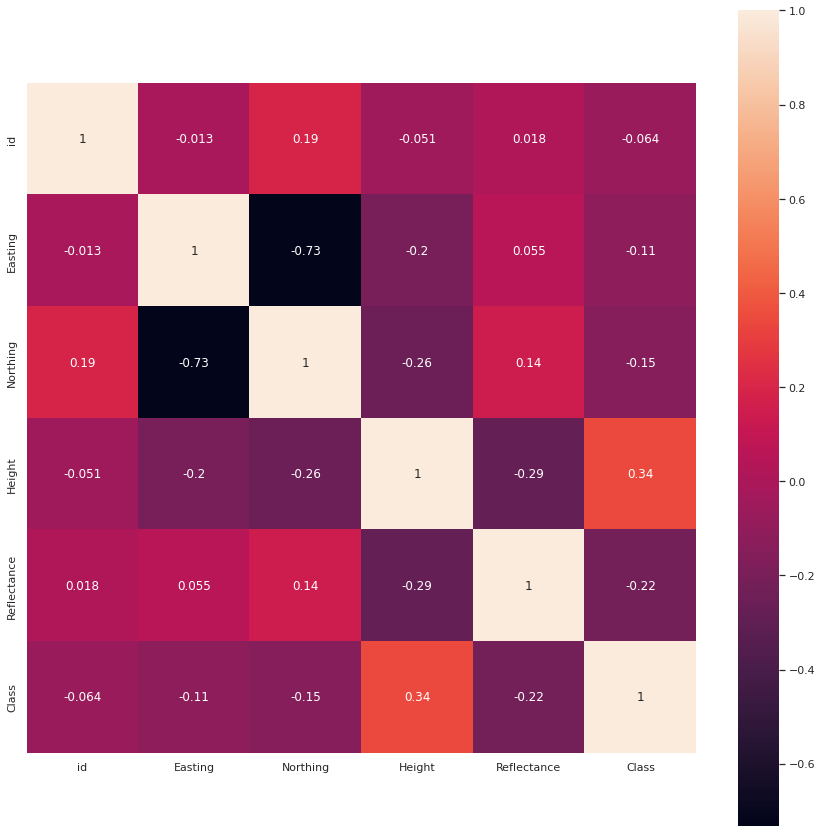

In [7]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

In [8]:
image = df_train[['Easting','Northing','Height','Reflectance','Class']]

image['Reflectance'] = (image['Reflectance'] - image['Reflectance'].min())
image['Reflectance']= image['Reflectance']/image['Reflectance'].max()

image['Easting'] = image['Easting'] - image['Easting'].min()

image['Northing'] = image['Northing'] - image['Northing'].min()

image['Height'] = image['Height'] - image['Height'].min()

<ipython-input-9-ccd0cdbef271>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image['Reflectance'] = (image['Reflectance'] - image['Reflectance'].min())
<ipython-input-9-ccd0cdbef271>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image['Reflectance']= image['Reflectance']/image['Reflectance'].max()
<ipython-input-9-ccd0cdbef271>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [9]:
image.describe()

,Easting,Northing,Height,Reflectance,Class
count,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06
mean,7.733064e+01,7.598867e+01,8.987192e+00,6.481419e-01,1.155633e+00
std,2.977279e+01,2.981495e+01,2.269884e+00,1.066937e-01,2.535087e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.307290e+01,5.188342e+01,7.376300e+00,5.985350e-01,0.000000e+00
50%,7.742760e+01,7.552180e+01,8.790500e+00,6.620983e-01,0.000000e+00
75%,1.013164e+02,1.003989e+02,8.885000e+00,7.143195e-01,3.000000e+00
max,1.517292e+02,1.519835e+02,7.330410e+01,1.000000e+00,6.400000e+01


In [11]:
image['Class'].unique()

array([ 0,  3,  4,  5,  1, 64])

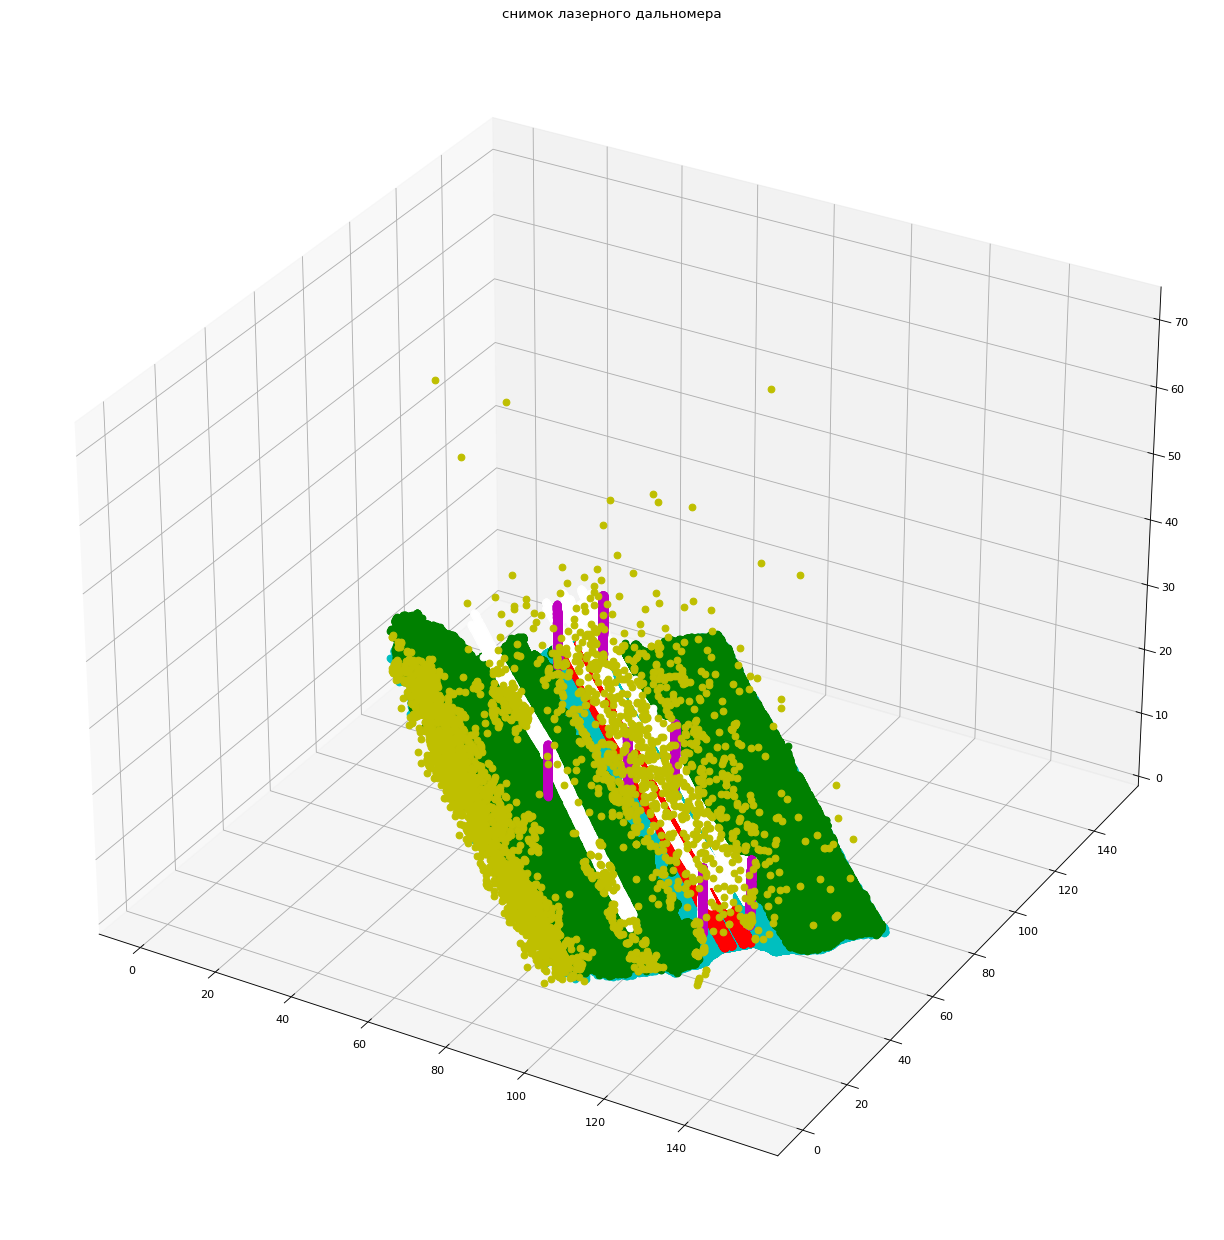

In [10]:
#!c1.8
image_0 = image.query('Class == 0')
image_3 = image.query('Class == 3')
image_4 = image.query('Class == 4')
image_5 = image.query('Class == 5')
image_1 = image.query('Class == 1')
image_64 = image.query('Class == 64')


fig = plt.figure(figsize=(20, 20), dpi=80)
 

ax = plt.axes(projection ='3d')
 
z_0 = image_0['Height']
x_0 = image_0['Easting']
y_0 = image_0['Northing']
 

ax.plot3D(x_0, y_0, z_0, 'ro', linestyle="None", color = 'c')

z_3 = image_3['Height']
x_3 = image_3['Easting']
y_3 = image_3['Northing']
 

ax.plot3D(x_3, y_3, z_3, 'ro', linestyle="None", color = 'g')

z_4 = image_4['Height']
x_4 = image_4['Easting']
y_4 = image_4['Northing']
 

ax.plot3D(x_4, y_4, z_4, 'ro', linestyle="None", color = 'r')

z_5 = image_5['Height']
x_5 = image_5['Easting']
y_5 = image_5['Northing']
 

ax.plot3D(x_5, y_5, z_5, 'ro', linestyle="None", color = 'w')

z_1 = image_1['Height']
x_1 = image_1['Easting']
y_1 = image_1['Northing']
 

ax.plot3D(x_1, y_1, z_1, 'ro', linestyle="None", color = 'm')

z_64 = image_64['Height']
x_64 = image_64['Easting']
y_64 = image_64['Northing']
 

ax.plot3D(x_64, y_64, z_64, 'ro', linestyle="None", color = 'y')


ax.set_title('снимок лазерного дальномера')
plt.rcParams['agg.path.chunksize'] = 4222094
plt.show()

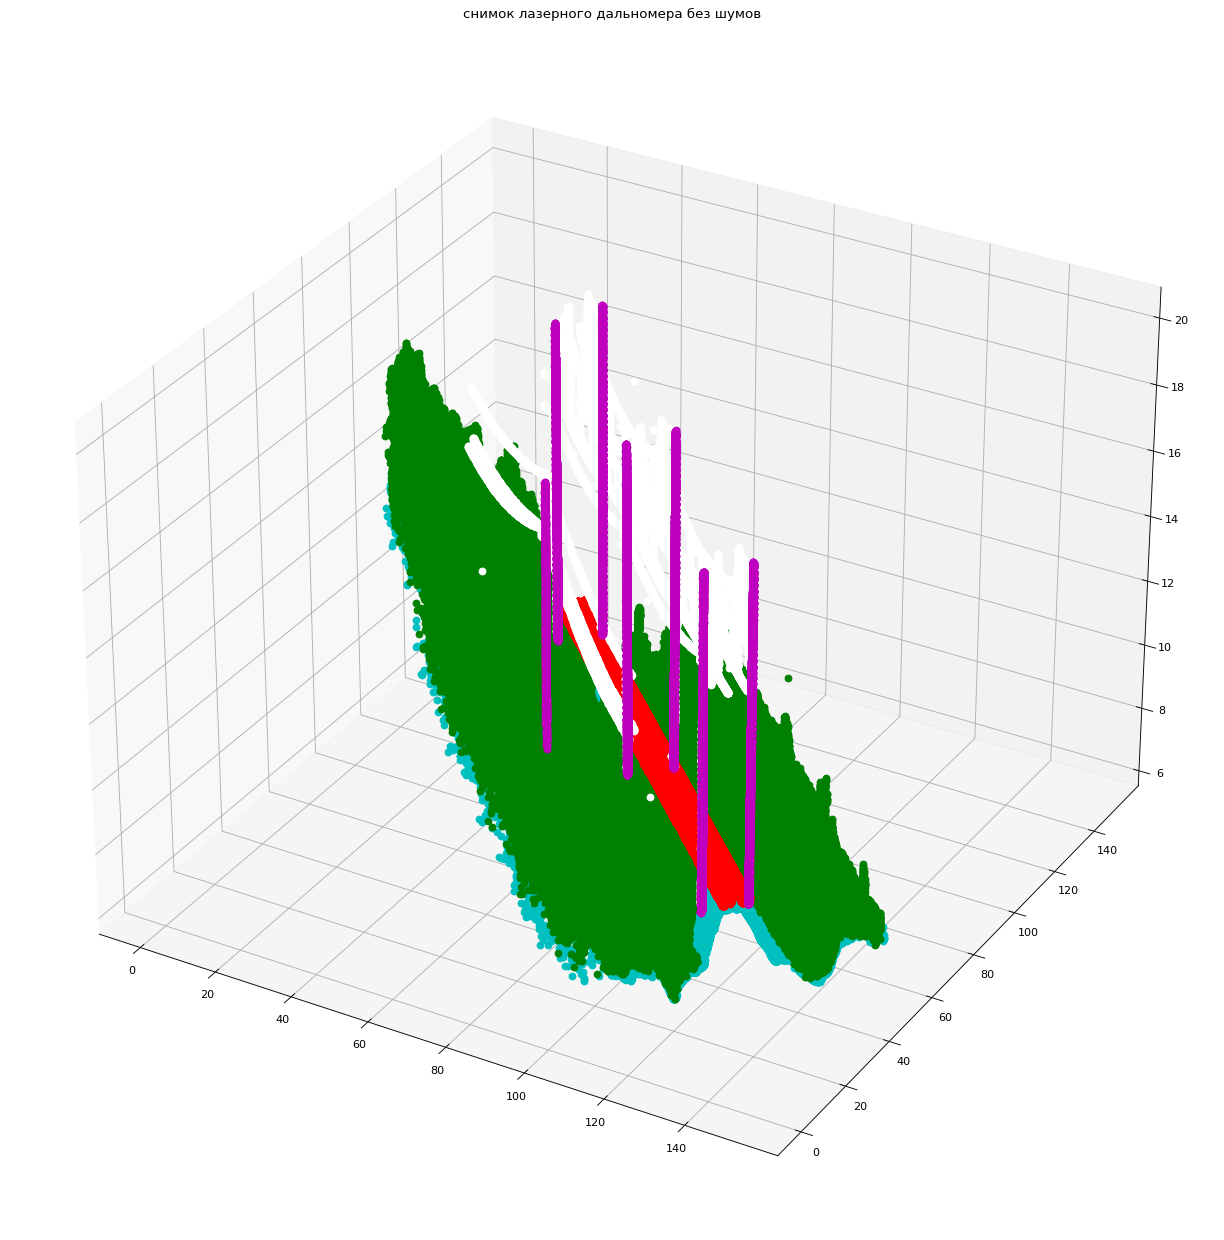

In [11]:

fig = plt.figure(figsize=(20, 20), dpi=80)
 

ax = plt.axes(projection ='3d')
 
z_0 = image_0['Height']
x_0 = image_0['Easting']
y_0 = image_0['Northing']
 

ax.plot3D(x_0, y_0, z_0, 'ro', linestyle="None", color = 'c')

z_3 = image_3['Height']
x_3 = image_3['Easting']
y_3 = image_3['Northing']
 

ax.plot3D(x_3, y_3, z_3, 'ro', linestyle="None", color = 'g')

z_4 = image_4['Height']
x_4 = image_4['Easting']
y_4 = image_4['Northing']
 

ax.plot3D(x_4, y_4, z_4, 'ro', linestyle="None", color = 'r')

z_5 = image_5['Height']
x_5 = image_5['Easting']
y_5 = image_5['Northing']
 

ax.plot3D(x_5, y_5, z_5, 'ro', linestyle="None", color = 'w')

z_1 = image_1['Height']
x_1 = image_1['Easting']
y_1 = image_1['Northing']
 

ax.plot3D(x_1, y_1, z_1, 'ro', linestyle="None", color = 'm')


ax.set_title('снимок лазерного дальномера без шумов')
plt.rcParams['agg.path.chunksize'] = 4222094
plt.show()

In [12]:
col = image['Reflectance']

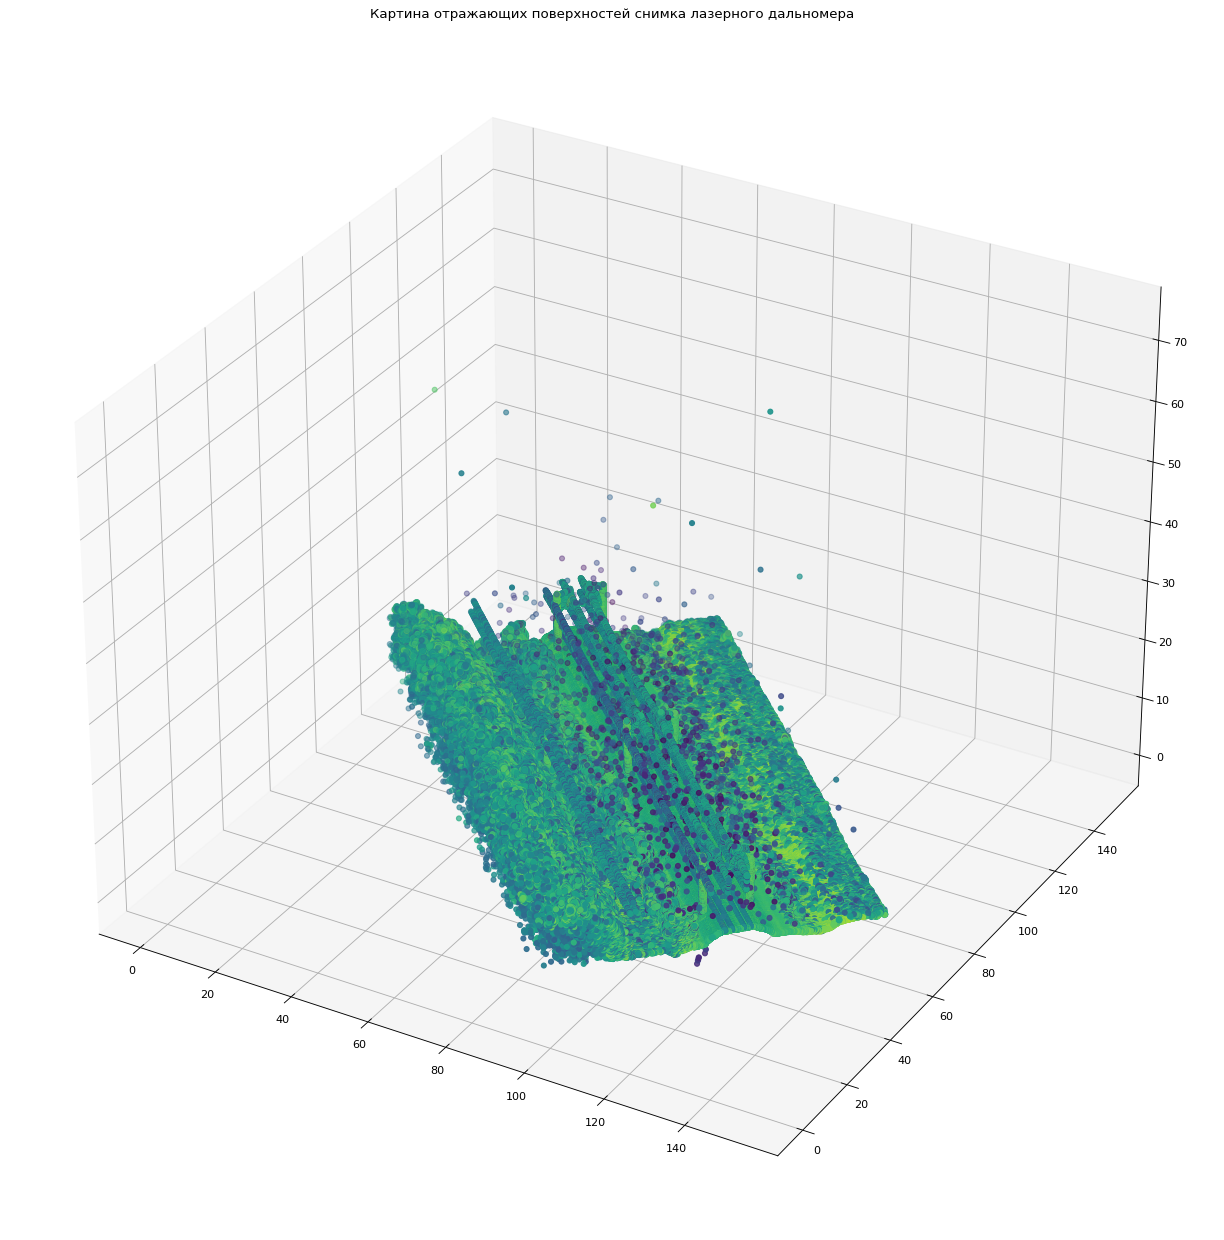

In [13]:
#!c1.8
from mpl_toolkits import mplot3d
import matplotlib as mpl


fig = plt.figure(figsize=(20, 20), dpi=80)
 

ax = plt.axes(projection ='3d')
 

z = image['Height']
x = image['Easting']
y = image['Northing']
 

ax.scatter3D(x, y, z, 'ro', linestyle="None", c = col)
ax.set_title('Картина отражающих поверхностей снимка лазерного дальномера')


plt.rcParams['agg.path.chunksize'] = 4222094

plt.show()

- количество точек-соседей со схожими характеристиками
- возможность "последовательного" роста объекта (гипотеза - объекты естественного происхождения формировались посредством большого количества малых изменений)


## Формирование признаков

#### характеристики области

##### усредненные значения отражения в области

In [651]:
fe = df_train.drop(['id'], axis=1)

In [652]:
fe['Easting'] = fe['Easting'].round(1) - fe['Easting'].round(1).min()
fe['Northing'] = fe['Northing'].round(1) - fe['Northing'].round(1).min()
fe['Height'] = fe['Height'].round(1) - fe['Height'].round(1).min()

In [653]:
grid = pd.pivot_table(fe, values='Reflectance', index=['Easting', 'Northing','Height'] , aggfunc=[np.mean,np.min,np.max])

In [654]:
grid = grid.reset_index()

In [655]:
new_cloumns = ['Easting','Northing','Height','Reflectance_mean','Reflectance_min','Reflectance_max']

grid = pd.DataFrame(np.array(grid), columns = new_cloumns) 

In [657]:
grid['Easting_'] = grid['Easting']
grid['Northing_'] = grid['Northing']
grid['Height_'] = grid['Height']

In [658]:
grid['Easting_'] = grid['Easting_'].round(1).astype(str)
grid['Northing_'] = grid['Northing_'].round(1).astype(str)
grid['Height_'] = grid['Height_'].round(1).astype(str)

In [659]:
grid['vect'] = grid['Easting_'] + grid['Northing_'] + grid['Height_']

In [660]:
grid = grid.drop(columns = ['Easting_','Northing_','Height_','Easting','Northing','Height'])

#### признаки

In [662]:
df = df_train.drop(['id'], axis=1)

In [663]:
df['Easting_'] = df['Easting']
df['Northing_'] = df['Northing']
df['Height_'] = df['Height']

In [664]:
df['Easting_'] = df['Easting_'].round(1) - df['Easting_'].round(1).min()
df['Northing_'] = df['Northing_'].round(1) - df['Northing_'].round(1).min()
df['Height_'] = df['Height_'].round(1) - df['Height_'].round(1).min()

In [666]:
df['Easting_'] = df['Easting_'].round(1).astype(str)
df['Northing_'] = df['Northing_'].round(1).astype(str)
df['Height_'] = df['Height_'].round(1).astype(str)

In [667]:
df['vect'] = df['Easting_'] + df['Northing_'] + df['Height_']

In [668]:
df = df.drop(columns = ['Easting_','Northing_','Height_','mean_reflectance_in_area'])

In [670]:
df = df.merge(grid, left_on='vect', right_on='vect', how='left')

In [671]:
df = df.drop(columns = ['vect'])

#### Усредненные значения отражений в столбах

In [785]:
fee = df_train.drop(['id','Height'], axis=1)

fee['Easting'] = fee['Easting'].round(1) - fee['Easting'].round(1).min()
fee['Northing'] = fee['Northing'].round(1) - fee['Northing'].round(1).min()


In [786]:
grid_ = pd.pivot_table(fee, values='Reflectance', index=['Easting', 'Northing'] , aggfunc=[np.mean,np.min,np.max])

In [787]:
grid_ = grid_.reset_index()

new_cloumns = ['Easting','Northing','Reflectance_mean_col','Reflectance_min_col','Reflectance_max_col']

grid_ = pd.DataFrame(np.array(grid_), columns = new_cloumns) 

In [788]:
grid_['Easting_'] = grid_['Easting']
grid_['Northing_'] = grid_['Northing']

grid_['Easting_'] = grid_['Easting_'].round(1).astype(str)
grid_['Northing_'] = grid_['Northing_'].round(1).astype(str)

grid_['vect'] = grid_['Easting_'] + grid_['Northing_']

grid_ = grid_.drop(columns = ['Easting_','Northing_','Easting','Northing'])

In [789]:
grid_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804799 entries, 0 to 804798
Data columns (total 4 columns):
Reflectance_mean_col    804799 non-null float64
Reflectance_min_col     804799 non-null float64
Reflectance_max_col     804799 non-null float64
vect                    804799 non-null object
dtypes: float64(3), object(1)
memory usage: 24.6+ MB


#### Признаки

In [796]:
df['Easting_'] = df['Easting']
df['Northing_'] = df['Northing']

df['Easting_'] = df['Easting_'].round(1) - df['Easting_'].round(1).min()
df['Northing_'] = df['Northing_'].round(1) - df['Northing_'].round(1).min()

df['Easting_'] = df['Easting_'].round(1).astype(str)
df['Northing_'] = df['Northing_'].round(1).astype(str)

In [797]:
df['vect'] = df['Easting_'] + df['Northing_'] 

df = df.drop(columns = ['Easting_','Northing_'])

In [798]:
df = df.merge(grid_, left_on='vect', right_on='vect', how='left')

df = df.drop(columns = ['vect'])

## Выделим выборки

In [801]:
features = df.drop(["Class"], axis = 1)
target = df[["Class"]]

In [802]:
features.shape

(4222094, 10)

In [803]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.3, random_state=12345)

## Обучение модели

### Scorer

In [804]:
scorer = make_scorer(recall_score, greater_is_better=True)

### Catboost

In [753]:
#!c1.32
model = CatBoostClassifier(verbose=100)

parameters = {'n_estimators' : sp_randInt(300, 400),
              'max_depth'    : sp_randInt(7, 15)}

randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1, scoring=scorer)
randm_src.fit(features_train, target_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/l

Learning rate set to 0.293335
0:	learn: 0.8812340	total: 9.51s	remaining: 53m 35s
100:	learn: 0.1215668	total: 6m 8s	remaining: 14m 27s
200:	learn: 0.1005993	total: 11m 39s	remaining: 8m
300:	learn: 0.0913622	total: 17m 9s	remaining: 2m 9s
338:	learn: 0.0893132	total: 19m 18s	remaining: 0us
Learning rate set to 0.293335
0:	learn: 0.8760145	total: 2.76s	remaining: 15m 33s
100:	learn: 0.1213701	total: 5m 50s	remaining: 13m 46s
200:	learn: 0.1005934	total: 11m 43s	remaining: 8m 3s
300:	learn: 0.0920371	total: 17m 17s	remaining: 2m 10s
338:	learn: 0.0894855	total: 19m 24s	remaining: 0us
Learning rate set to 0.293335
0:	learn: 0.8809734	total: 9.03s	remaining: 50m 51s
100:	learn: 0.1226461	total: 6m 46s	remaining: 15m 58s
200:	learn: 0.1017566	total: 13m 4s	remaining: 8m 58s
300:	learn: 0.0920242	total: 19m 16s	remaining: 2m 26s
338:	learn: 0.0894881	total: 21m 42s	remaining: 0us
Learning rate set to 0.293335
0:	learn: 0.8755284	total: 4.4s	remaining: 24m 47s
100:	learn: 0.1207989	total: 6m

KeyboardInterrupt: 

In [741]:
model_Catboost.get_all_params()


{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 390,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'use_best_model': False,
 'class_names': [0, 1, 3, 4, 5, 64],
 'random_seed': 54228312,
 'depth': 10,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'MultiClass',
 'learning_rate': 0.2635580003261566,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type'

In [806]:
#!c1.32
model_Catboost =  CatBoostClassifier(
                                random_state=54228312,  
                                max_depth=10,
                                n_estimators=390,
                                verbose=100                                
                                           ) 
model_Catboost.fit(features_train, target_train)

Learning rate set to 0.263558
0:	learn: 0.8870831	total: 2.94s	remaining: 19m 2s
100:	learn: 0.0963484	total: 4m 15s	remaining: 12m 10s
200:	learn: 0.0825148	total: 8m 39s	remaining: 8m 8s
300:	learn: 0.0768387	total: 13m 3s	remaining: 3m 51s
389:	learn: 0.0730706	total: 17m 5s	remaining: 0us


In [ ]:
#!c1.32
scores_Catboost = cross_val_score(model_Catboost, features_train, target_train, cv=5, scoring= scorer)

In [746]:
#!c1.32
scores_Catboost

array([0.96808614, 0.96790153, 0.96787247, 0.96766399, 0.96795792])

In [807]:
#!c1.32
pred_Catboost = model_Catboost.predict(features_valid)

In [809]:
#!c1.32
result_Catboost = recall_score(target_valid, pred_Catboost, average='macro') 

print("Recall score",result_Catboost)

Recall score 0.8608692553946239


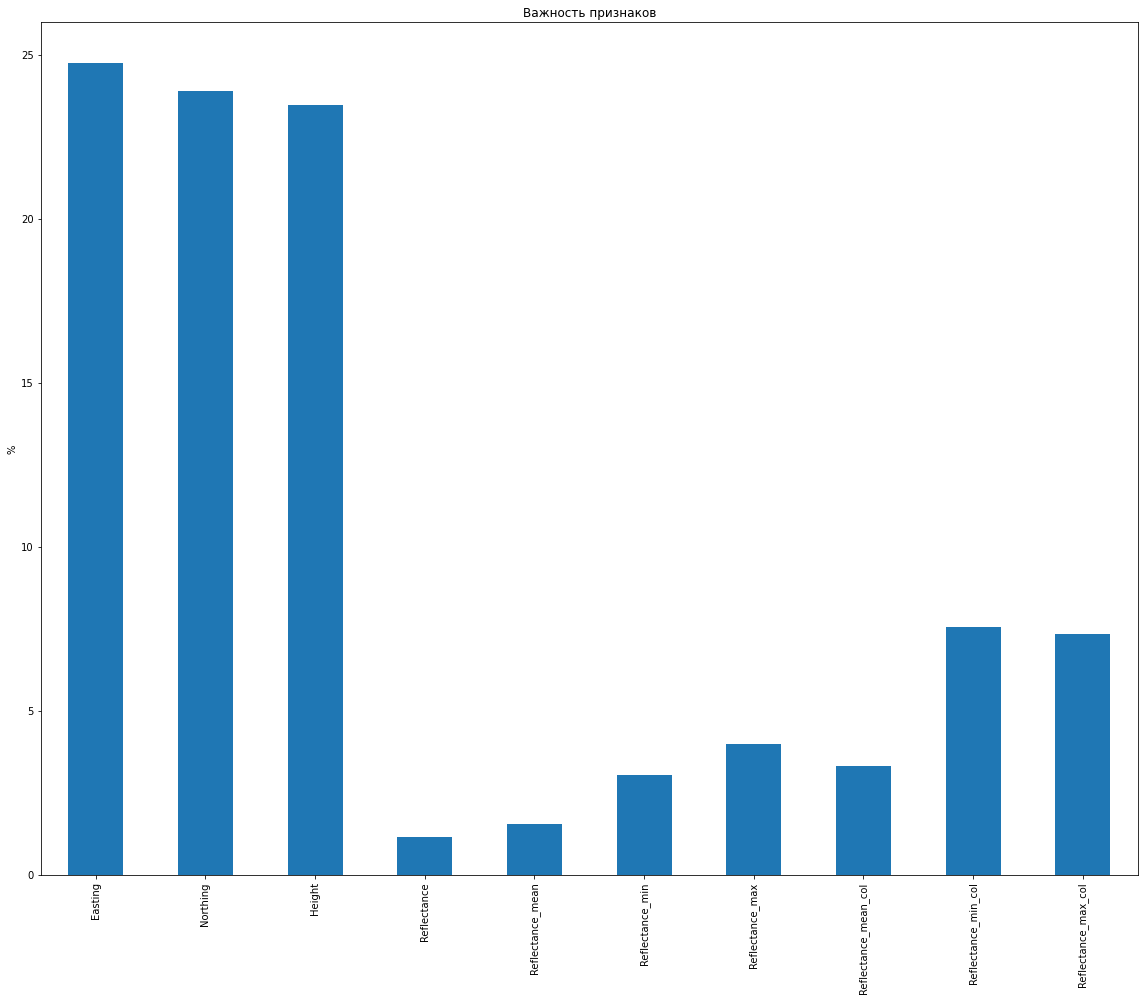

In [810]:
#!c1.32
importance = pd.Series(model_Catboost.get_feature_importance(), features_train.columns)


fig, ax = plt.subplots(figsize=(16,14))
importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('%')
fig.tight_layout()


## Итоговое предсказание

In [687]:
fe_test = df_test.drop(['id'], axis=1)

fe_test['Easting'] = fe_test['Easting'].round(1) - fe_test['Easting'].round(1).min()
fe_test['Northing'] = fe_test['Northing'].round(1) - fe_test['Northing'].round(1).min()
fe_test['Height'] = fe_test['Height'].round(1) - fe_test['Height'].round(1).min()

grid_test = pd.pivot_table(fe_test, values='Reflectance', index=['Easting', 'Northing','Height'] , aggfunc=[np.mean,np.min,np.max])

grid_test = grid_test.reset_index()

new_cloumns = ['Easting','Northing','Height','Reflectance_mean','Reflectance_min','Reflectance_max']

grid_test = pd.DataFrame(np.array(grid_test), columns = new_cloumns) 

grid_test['Easting_'] = grid_test['Easting']
grid_test['Northing_'] = grid_test['Northing']
grid_test['Height_'] = grid_test['Height']

grid_test['Easting_'] = grid_test['Easting_'].round(1).astype(str)
grid_test['Northing_'] = grid_test['Northing_'].round(1).astype(str)
grid_test['Height_'] = grid_test['Height_'].round(1).astype(str)

grid_test['vect'] = grid_test['Easting_'] + grid_test['Northing_'] + grid_test['Height_']

grid_test = grid_test.drop(columns = ['Easting_','Northing_','Height_','Easting','Northing','Height'])

In [691]:
df_t = df_test.drop(['id'], axis=1)

df_t['Easting_'] = df_t['Easting']
df_t['Northing_'] = df_t['Northing']
df_t['Height_'] = df_t['Height']

df_t['Easting_'] = df_t['Easting_'].round(1) - df_t['Easting_'].round(1).min()
df_t['Northing_'] = df_t['Northing_'].round(1) - df_t['Northing_'].round(1).min()
df_t['Height_'] = df_t['Height_'].round(1) - df_t['Height_'].round(1).min()

df_t['Easting_'] = df_t['Easting_'].round(1).astype(str)
df_t['Northing_'] = df_t['Northing_'].round(1).astype(str)
df_t['Height_'] = df_t['Height_'].round(1).astype(str)

df_t['vect'] = df_t['Easting_'] + df_t['Northing_'] + df_t['Height_']

df_t = df_t.drop(columns = ['Easting_','Northing_','Height_'])

df_t = df_t.merge(grid_test, left_on='vect', right_on='vect', how='left')

df_t = df_t.drop(columns = ['vect'])

In [813]:
fe_test = df_test.drop(['id','Height'], axis=1)

fe_test['Easting'] = fe_test['Easting'].round(1) - fe_test['Easting'].round(1).min()
fe_test['Northing'] = fe_test['Northing'].round(1) - fe_test['Northing'].round(1).min()


grid_test = pd.pivot_table(fe_test, values='Reflectance', index=['Easting', 'Northing'] , aggfunc=[np.mean,np.min,np.max])

grid_test = grid_test.reset_index()

new_cloumns = ['Easting','Northing','Reflectance_mean_col','Reflectance_min_col','Reflectance_max_col']

grid_test = pd.DataFrame(np.array(grid_test), columns = new_cloumns) 

grid_test['Easting_'] = grid_test['Easting']
grid_test['Northing_'] = grid_test['Northing']

grid_test['Easting_'] = grid_test['Easting_'].round(1).astype(str)
grid_test['Northing_'] = grid_test['Northing_'].round(1).astype(str)

grid_test['vect'] = grid_test['Easting_'] + grid_test['Northing_']

grid_test = grid_test.drop(columns = ['Easting_','Northing_','Easting','Northing'])

In [814]:
df_t['Easting_'] = df_t['Easting']
df_t['Northing_'] = df_t['Northing']

df_t['Easting_'] = df_t['Easting_'].round(1) - df_t['Easting_'].round(1).min()
df_t['Northing_'] = df_t['Northing_'].round(1) - df_t['Northing_'].round(1).min()

df_t['Easting_'] = df_t['Easting_'].round(1).astype(str)
df_t['Northing_'] = df_t['Northing_'].round(1).astype(str)

df_t['vect'] = df_t['Easting_'] + df_t['Northing_'] 

df_t = df_t.drop(columns = ['Easting_','Northing_'])

df_t = df_t.merge(grid_test, left_on='vect', right_on='vect', how='left')

df_t = df_t.drop(columns = ['vect'])

In [815]:
df_t.head()

,Easting,Northing,Height,Reflectance,Reflectance_mean,Reflectance_min,Reflectance_max,Reflectance_mean_col,Reflectance_min_col,Reflectance_max_col
0,431754.6192,6.032265e+06,69.2608,-13.99,-13.300000,-13.99,-12.83,-13.57750,-14.41,-12.83
1,431654.4141,6.032344e+06,68.0129,-10.99,-10.990000,-10.99,-10.99,-11.36125,-23.51,-3.97
2,431686.8574,6.032334e+06,69.2442,-10.26,-9.603333,-12.15,-6.40,-10.04625,-12.26,-6.40
3,431711.5747,6.032293e+06,69.6617,-8.25,-8.250000,-8.25,-8.25,-8.57500,-8.90,-8.25
4,431728.5806,6.032315e+06,67.6753,-7.56,-7.560000,-7.56,-7.56,-7.34000,-10.70,-2.71


In [816]:
features_test = df_t

In [817]:
#!c1.32
pred_Catboost_test = model_Catboost.predict(features_test)

## Выгрузка результатов


In [819]:
df_test

,id,Easting,Northing,Height,Reflectance
0,1836965,431754.6192,6.032265e+06,69.2608,-13.99
1,3659389,431654.4141,6.032344e+06,68.0129,-10.99
2,5433033,431686.8574,6.032334e+06,69.2442,-10.26
3,1168709,431711.5747,6.032293e+06,69.6617,-8.25
4,5821779,431728.5806,6.032315e+06,67.6753,-7.56
...,...,...,...,...,...
1809464,2279523,431691.6346,6.032326e+06,69.2069,-11.32
1809465,220720,431712.8414,6.032338e+06,66.8942,-2.79
1809466,3877535,431695.1493,6.032328e+06,69.2111,-4.83
1809467,3389299,431743.6840,6.032275e+06,69.2310,-9.17


In [820]:
result = pd.DataFrame()
result['id'] = df_test['id']

In [822]:
result['Class'] = pred_Catboost_test

In [823]:
result.to_csv('prediction_2.csv', index = False)